In [7]:
import sys

import matplotlib.pyplot as plt
import math
sys.path.append("/home/eoca2018/unrealcv/client/python")
from unrealcv import client as ue4
from unrealcv.util import read_png

In [8]:
ue4.connect(timeout=5)

if not ue4.isconnected():
    print("UnrealCV server is not running.")
else:
    print(ue4.request("vget /unrealcv/status"))

ERROR:__init__:165:Socket is created, but can not get connection confirm from ('localhost', 9000), timeout after 5.00 seconds


UnrealCV server is not running.


In [3]:
print(ue4.request("vget /unrealcv/help"))

vrun [str]
Run UE4 built-in commands
vget /objects
Get the name of all objects
vget /object/[str]/color
Get the labeling color of an object (used in object instance mask)
vset /object/[str]/color [uint] [uint] [uint]
Set the labeling color of an object [r, g, b]
vget /object/[str]/name
[debug] Get the object name
vget /object/[str]/location
Get object location [x, y, z]
vget /object/[str]/rotation
Get object rotation [pitch, yaw, roll]
vset /object/[str]/location [float] [float] [float]
Set object location [x, y, z]
vset /object/[str]/rotation [float] [float] [float]
Set object rotation [pitch, yaw, roll]
vget /object/[str]/mobility
Is the object static or movable?
vset /object/[str]/show
Show object
vset /object/[str]/hide
Hide object
vget /camera/[uint]/[str]
Get snapshot from camera, the third parameter is optional
vget /camera/[uint]/[str] [str]
Get snapshot from camera, the third parameter is optional
vget /camera/[uint]/lit
Get snapshot from camera, the third parameter is optiona

In [5]:
ue4.request("vset /camera/0/pose 700 -700 100 0 90 0")

'ok'

In [16]:
image_formats = ["lit", "normal", "depth", "object_mask"]
image_filepaths = [ue4.request(f"vget /camera/0/{f} png") for f in image_formats]
images = [read_png(f) for f in image_filepaths]

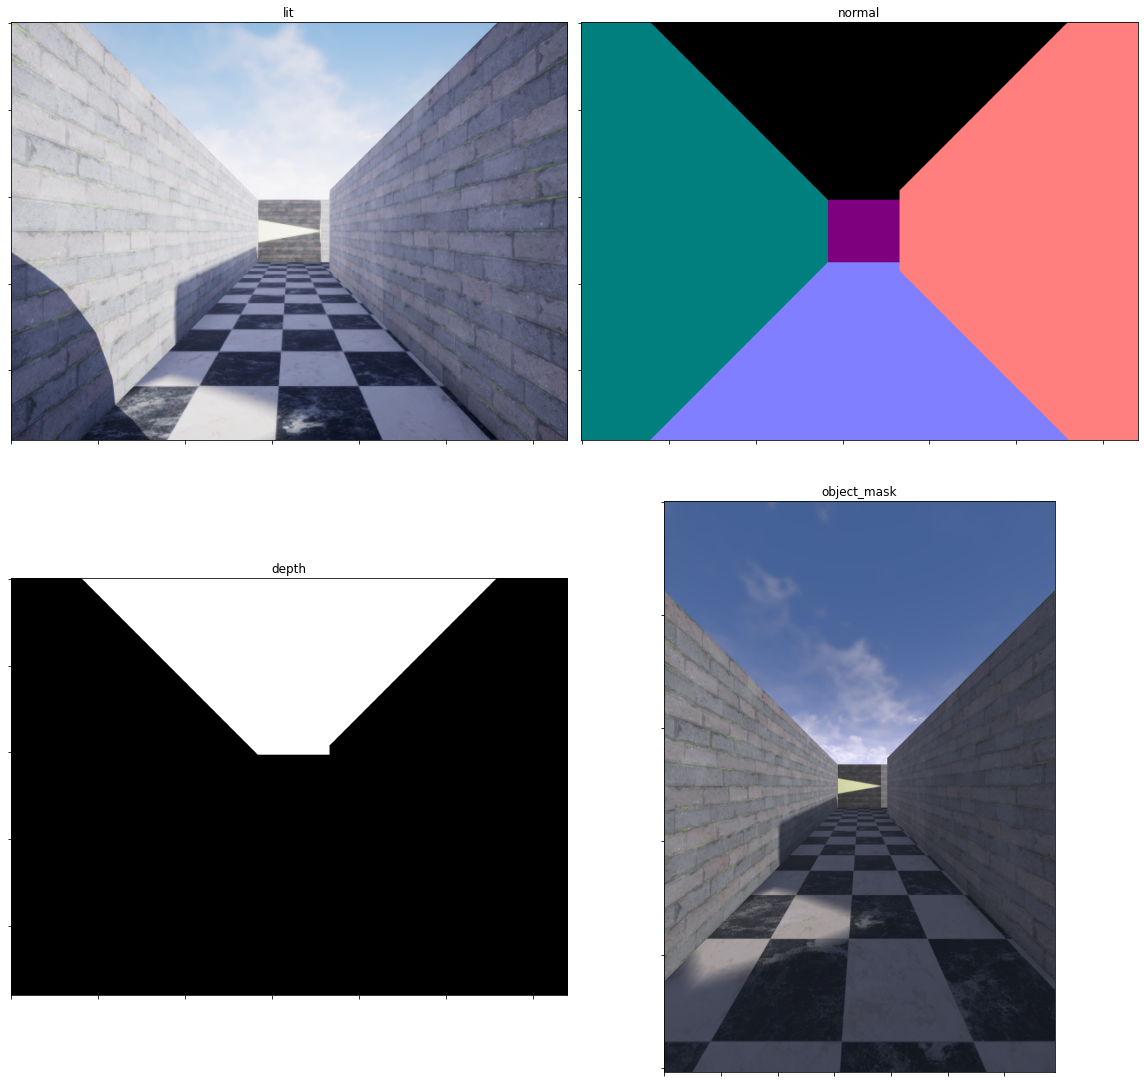

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

for ax, img, img_format in zip(axes.flat, images, image_formats):
    ax.imshow(img)
    ax.set_title(img_format)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

plt.tight_layout()

In [61]:
ue4.request("vset /camera/0/pose 700 -700 100 0 90 0")

'ok'

In [26]:
turn_speed = 2.5
walk_speed = 5.0

x, y, angle = 700, -700, 90

In [27]:
ue4.request(f"vset /camera/0/pose {x} {y} 100 0 {angle} 0")

'ok'

In [28]:
x += walk_speed
ue4.request(f"vset /camera/0/pose {x} {y} 100 0 {angle} 0")

'ok'

In [29]:
angle += turn_speed
ue4.request(f"vset /camera/0/pose {x} {y} 100 0 {angle} 0")

'ok'

In [ ]:
# Camera should be at (x, y, z)
# x = 
# y = 
# z = 100


# x (subtract 50 to put in middle of hallway)
# 0-> 1050
# 0.5 -> 1000
# middle -> 50
# middle of middle hall -> 100
# last cell ->
# middle of last wall -> -1000

# y (subtract 50)
# 0 -> -1050
# 0.5 -> -1000
# middle -> -50
# middle of middle hall -> -100

# z is always 100

# only rotate around z axis (probably yaw?)

# vset /camera/[id]/pose [x] [y] [z] [pitch] [yaw] [roll]
#     (v0.3.10) Teleport camera to location [x, y, z] and rotation [pitch, yaw, roll]

In [69]:
class UE4EnvWrapper():
    
    def __init__(self, ue4):
        self.ue4 = ue4
        
        self.x = 700
        self.y = -700
        self.angle = 0
        
        self.turn_speed = 5
        self.walk_speed = 25
        
        self.set_pose()
        
    def set_pose(self, *, x=None, y=None, angle=None):
        self.x = x if x else self.x
        self.y = y if y else self.y
        self.angle = angle if angle else self.angle
        self.ue4.request(f"vset /camera/0/pose {self.x} {self.y} 100 0 {self.angle} 0")
    
    def left(self):
        self.set_pose(angle=self.angle - self.turn_speed)
        
    def right(self):
        self.set_pose(angle=self.angle + self.turn_speed)
        
    def forward(self):
        # TODO: not working (see InteractiveUnreal.py)
        rad = math.radians(self.angle)
        x_diff, y_diff = round(self.walk_speed*math.cos(rad)), round(self.walk_speed*math.sin(rad))
        self.set_pose(x=self.x + x_diff, y=self.y + y_diff)
        
    def request_image(self):
        image_data = ue4.request(f"vget /camera/0/lit png")
        return read_png(image_data)
    
    def show(self):
        plt.imshow(self.request_image())

In [70]:
env = UE4EnvWrapper(ue4)
env.set_pose(angle = 90)

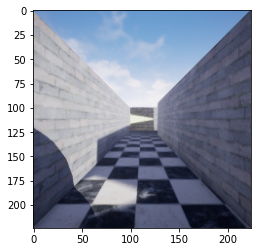

In [71]:
env.show()

In [66]:
from skimage.io import imread, imsave
import numpy as np

imsave(, env.request_image())

NameError: name 'os' is not defined

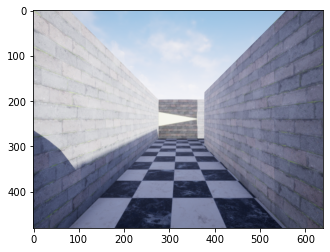

In [58]:
env.forward()
env.show()

In [72]:
! python UnrealAutomator.py "../Mazes/training_mazes8x8/maze_01.txt" 0 "test_imgs" True

ERROR:__init__:165:Socket is created, but can not get connection confirm from ('localhost', 9000), timeout after 5.00 seconds
UnrealCV server is not running.
ERROR:__init__:230:Fail to send message, client is not connected
ERROR:__init__:336:Can not receive a response from server, timeout after 5.00 seconds
ERROR:__init__:230:Fail to send message, client is not connected
^C
Traceback (most recent call last):
  File "UnrealAutomator.py", line 429, in <module>
    main()
  File "UnrealAutomator.py", line 418, in main
    navigator = Navigator(maze, img_dir)
  File "UnrealAutomator.py", line 371, in __init__
    self.world.set_pose(angle = start_angle)
  File "/home/CAMPUS/eoca2018/raycasting-simulation/Unreal/UnrealUtils.py", line 32, in set_pose
    self.ue4.request(f"vset /camera/0/pose {self.x} {self.y} 100 0 {self.angle} 0")
  File "/home/CAMPUS/eoca2018/anaconda3/envs/arcssummer/lib/python3.8/site-packages/unrealcv/__init__.py", line 329, in request
    isset = self.wait_response.wa